In [1]:
import random
import math
import matplotlib.pyplot as plt
import time


In [2]:
# Function to generate random user positions on the grid
def generate_random_users(m, n, num_users):
    users = []
    for _ in range(num_users):
        x = random.uniform(0, m)
        y = random.uniform(0, n)
        users.append([x, y])  # Use list for mutable positions
    return users

In [3]:
# Function to simulate random walk for users
def move_users(users, m, n, step_size=0.5):
    for user in users:
        user[0] += random.uniform(-step_size, step_size)
        user[1] += random.uniform(-step_size, step_size)
        user[0] = max(0, min(user[0], m))  # Keep within grid
        user[1] = max(0, min(user[1], n))  # Keep within grid


In [4]:
# Function to calculate distance between two points
def distance(p1, p2):
    return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)


In [5]:
# Function to find users covered by a UAV at a given position
def users_covered_by_uav(uav_pos, users, coverage_radius):
    covered_users = []
    for user in users:
        if distance(uav_pos, user) <= coverage_radius:
            covered_users.append(tuple(user))  # Convert list to tuple
    return covered_users


In [6]:
# Greedy algorithm to place UAVs
def place_uavs_greedy(m, n, users, coverage_radius, coverage_threshold=0.9):
    uav_positions = [(i, j) for i in range(m) for j in range(n)]
    selected_uavs = []
    covered_users = set()
    total_users = len(users)
    required_coverage = coverage_threshold * total_users

    uav_cover_dict = []
    
    while len(covered_users) < required_coverage:
        best_uav = None
        best_covered_users = set()

        for uav_pos in uav_positions:
            current_covered_users = set(users_covered_by_uav(uav_pos, users, coverage_radius))
            new_covered_users = current_covered_users - covered_users

             #  Penalty

            penalty = 0

            if len(uav_cover_dict) >= 0:
                for cov_users in uav_cover_dict:
                    penalty += len(cov_users) -  len(cov_users - best_covered_users)

            penalty = 0.3 * penalty    
            
            if len(new_covered_users) > len(best_covered_users):
                best_uav = uav_pos
                best_covered_users = new_covered_users

        if best_uav is None:
            break

        selected_uavs.append(best_uav)
        covered_users.update(best_covered_users)
        uav_positions.remove(best_uav)
        uav_cover_dict.append(best_covered_users)
    
    return selected_uavs, covered_users


In [7]:
# Function to visualize the grid, users, and UAV coverage
def visualize_grid(m, n, users, selected_uavs, coverage_radius, time_step):
    plt.figure(figsize=(10, 10))
    
    # Plot users
    for user in users:
        plt.plot(user[0], user[1], 'bo', label='User' if users.index(user) == 0 else "")

    # Plot UAV coverage
    for uav in selected_uavs:
        circle = plt.Circle(uav, coverage_radius, color='r', alpha=0.3, label='UAV Coverage' if selected_uavs.index(uav) == 0 else "")
        plt.gca().add_patch(circle)
        plt.plot(uav[0], uav[1], 'rx', markersize=10, label='UAV Position' if selected_uavs.index(uav) == 0 else "")
    
    # Set plot limits and labels
    plt.xlim(0, m)
    plt.ylim(0, n)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.grid(True)
    plt.xlabel('Grid X')
    plt.ylabel('Grid Y')
    plt.title(f'UAV Coverage on Grid at Time Step {time_step}')
    plt.legend()
    plt.show()


In [8]:
# Simulation parameters
m, n = 10, 10  # Grid size
num_users = 100  # Number of users
coverage_radius = 2.5  # Coverage radius of each UAV
time_steps = 10  # Number of time steps to simulate


In [9]:
# Generate random users
users = generate_random_users(m, n, num_users)


In [10]:
# Place UAVs using the greedy algorithm based on initial user distribution
selected_uavs, covered_users = place_uavs_greedy(m, n, users, coverage_radius)


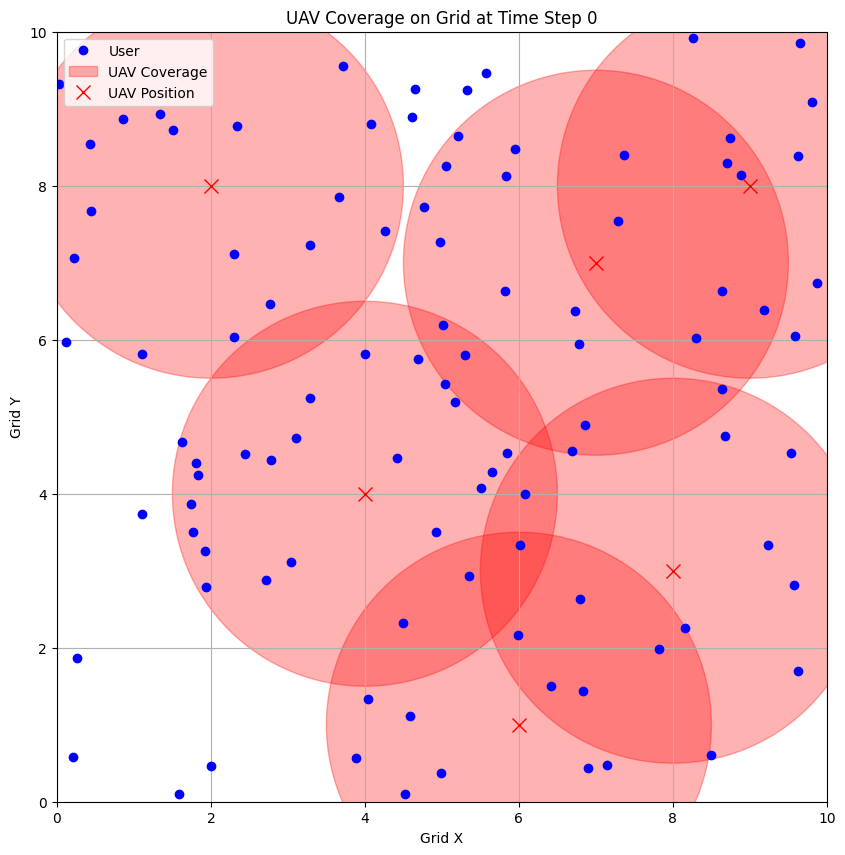

In [11]:
# Initial visualization
visualize_grid(m, n, users, selected_uavs, coverage_radius, time_step=0)


Time Step 1:
Covered users: 87
Coverage percentage: 87.00%


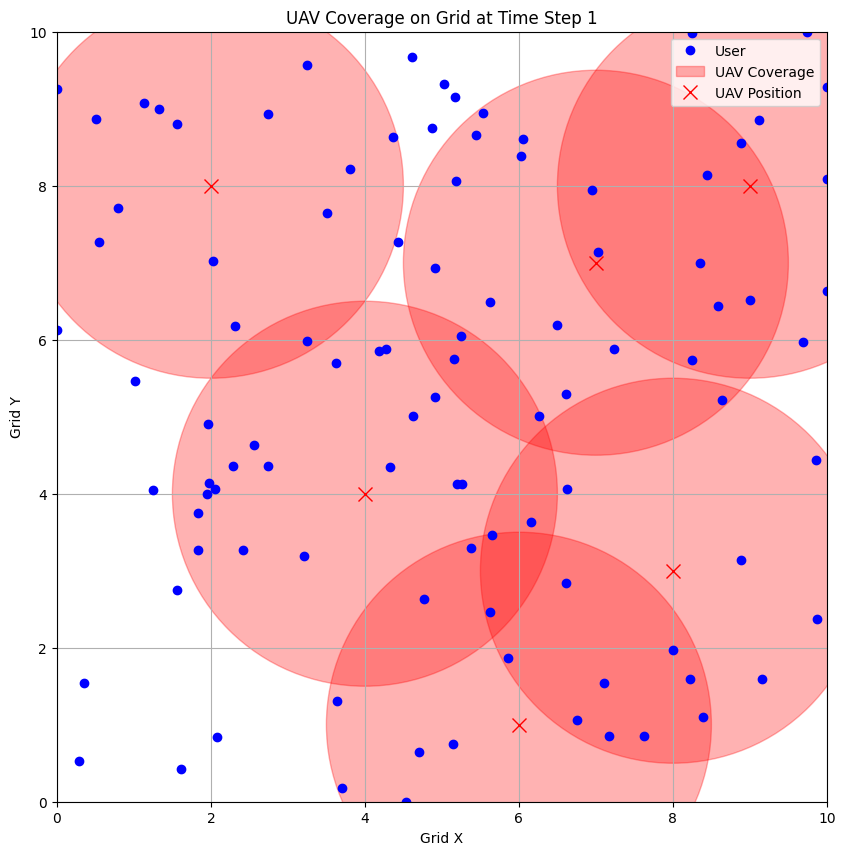

Time Step 2:
Covered users: 86
Coverage percentage: 86.00%


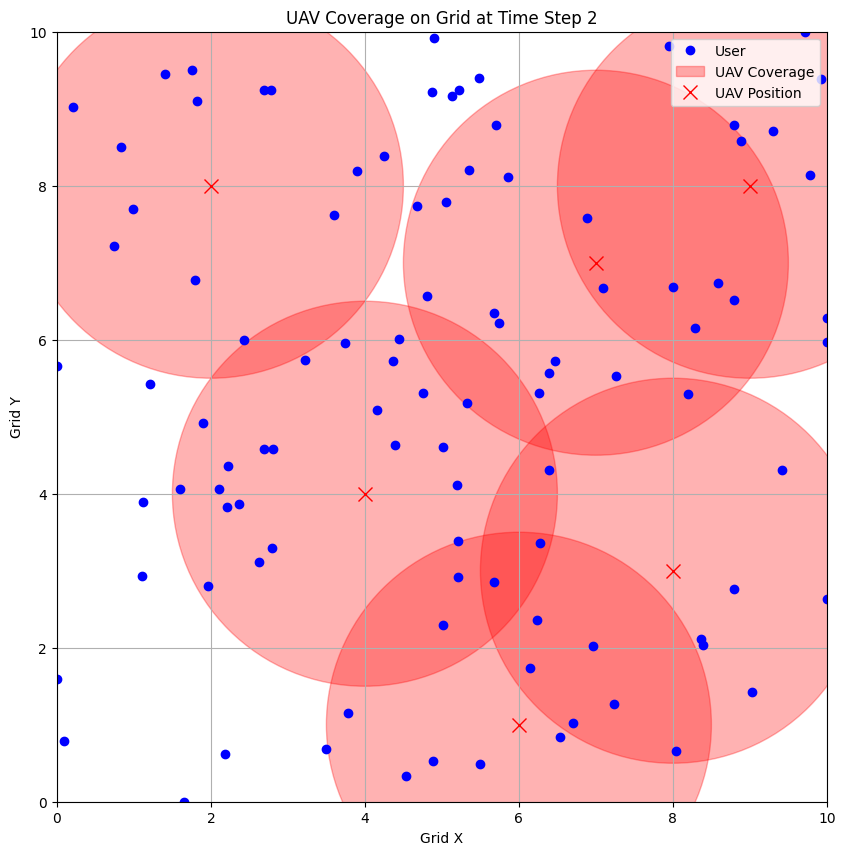

Time Step 3:
Covered users: 87
Coverage percentage: 87.00%


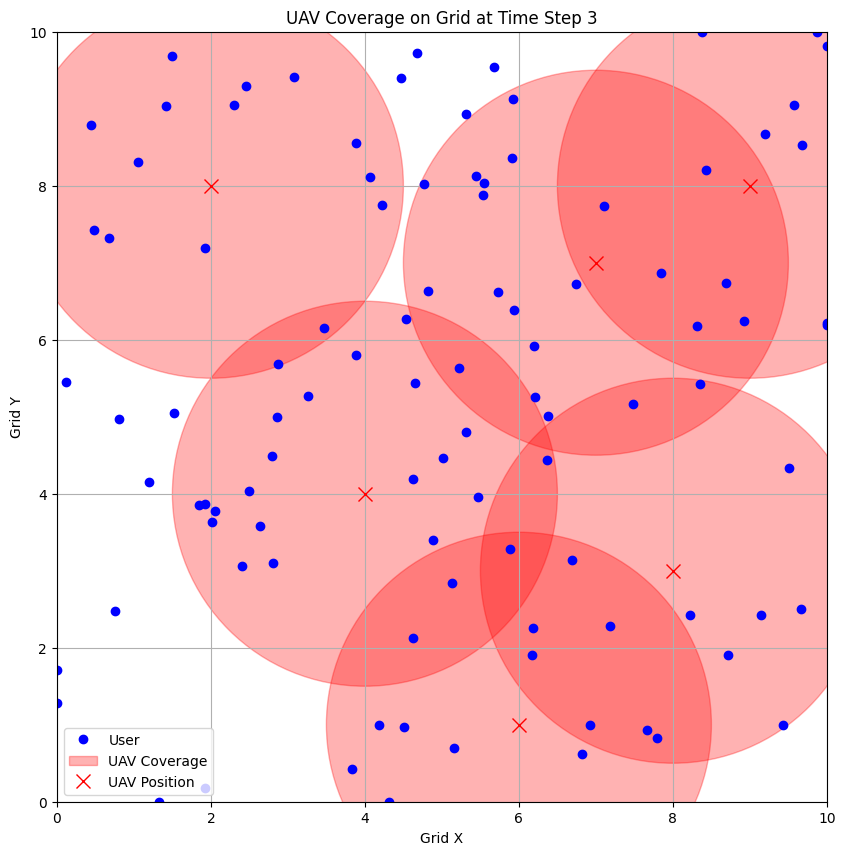

Time Step 4:
Covered users: 83
Coverage percentage: 83.00%


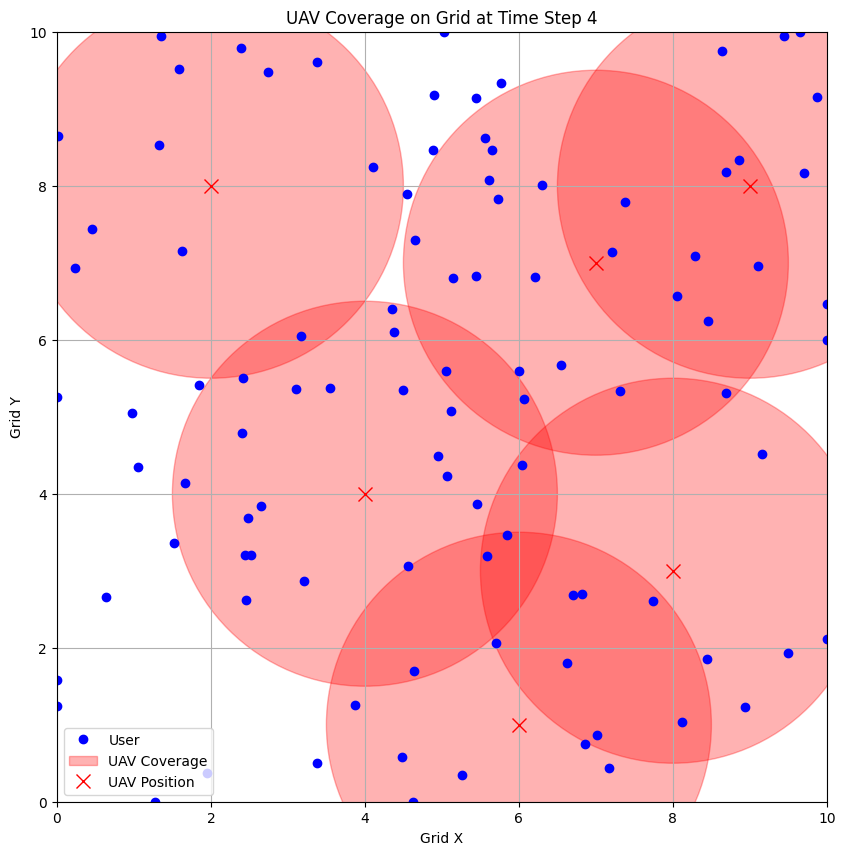

Time Step 5:
Covered users: 84
Coverage percentage: 84.00%


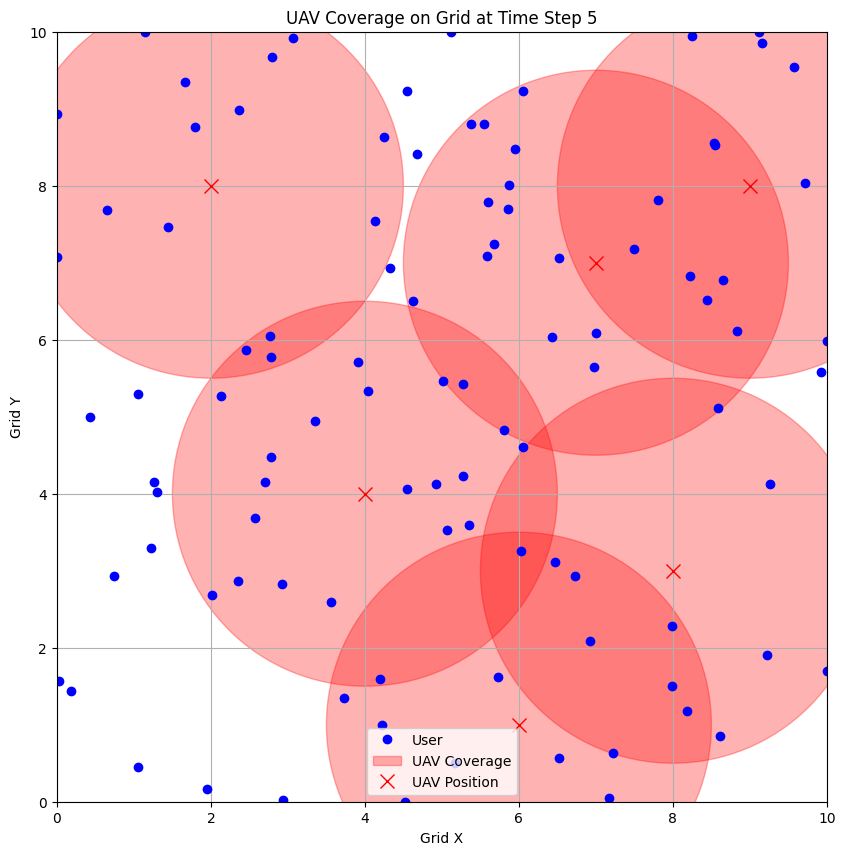

Time Step 6:
Covered users: 84
Coverage percentage: 84.00%


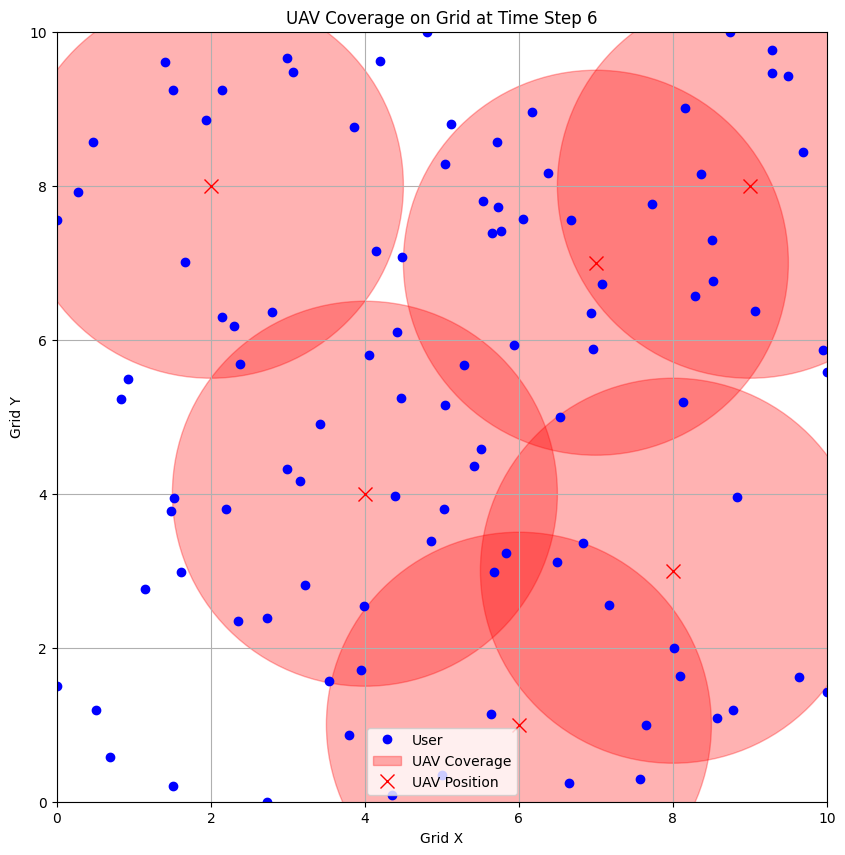

Time Step 7:
Covered users: 83
Coverage percentage: 83.00%


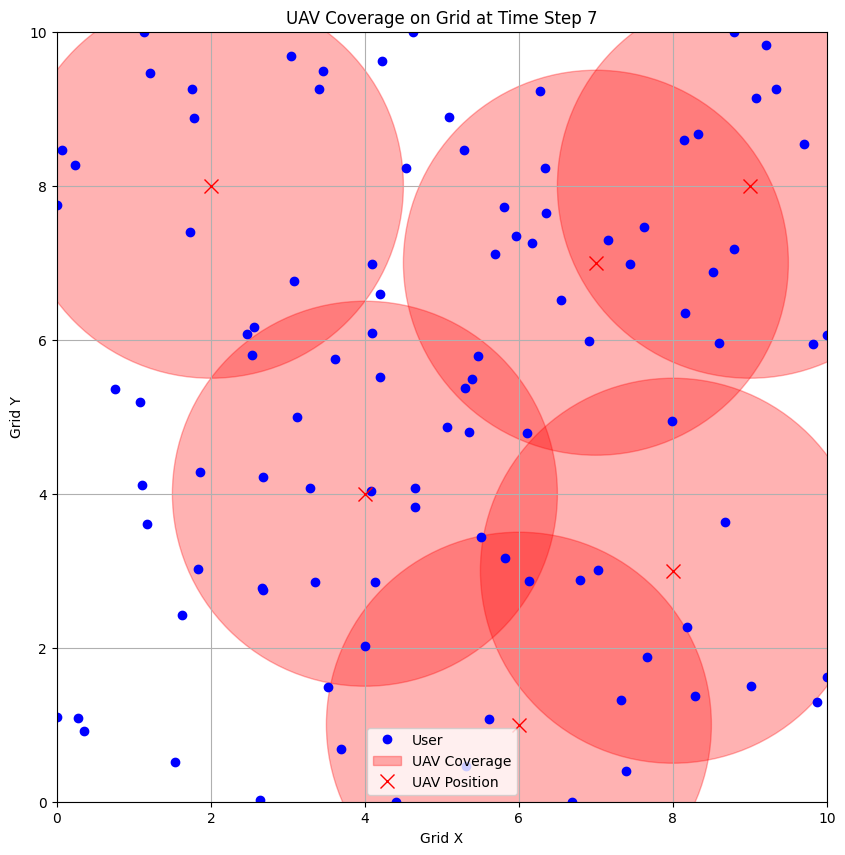

Time Step 8:
Covered users: 83
Coverage percentage: 83.00%


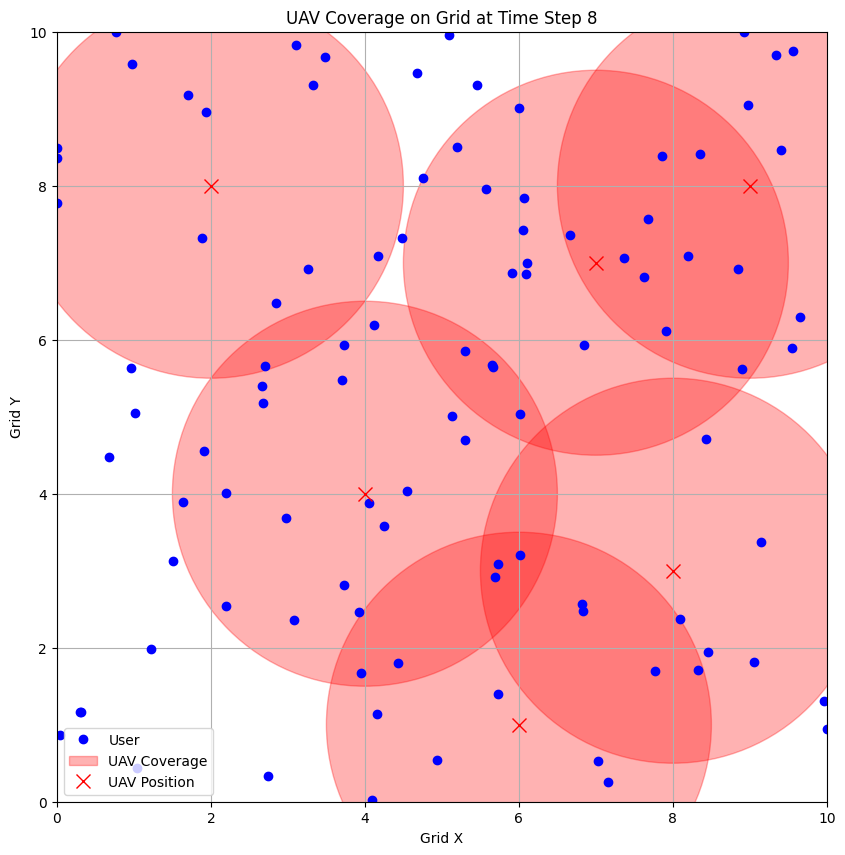

Time Step 9:
Covered users: 81
Coverage percentage: 81.00%


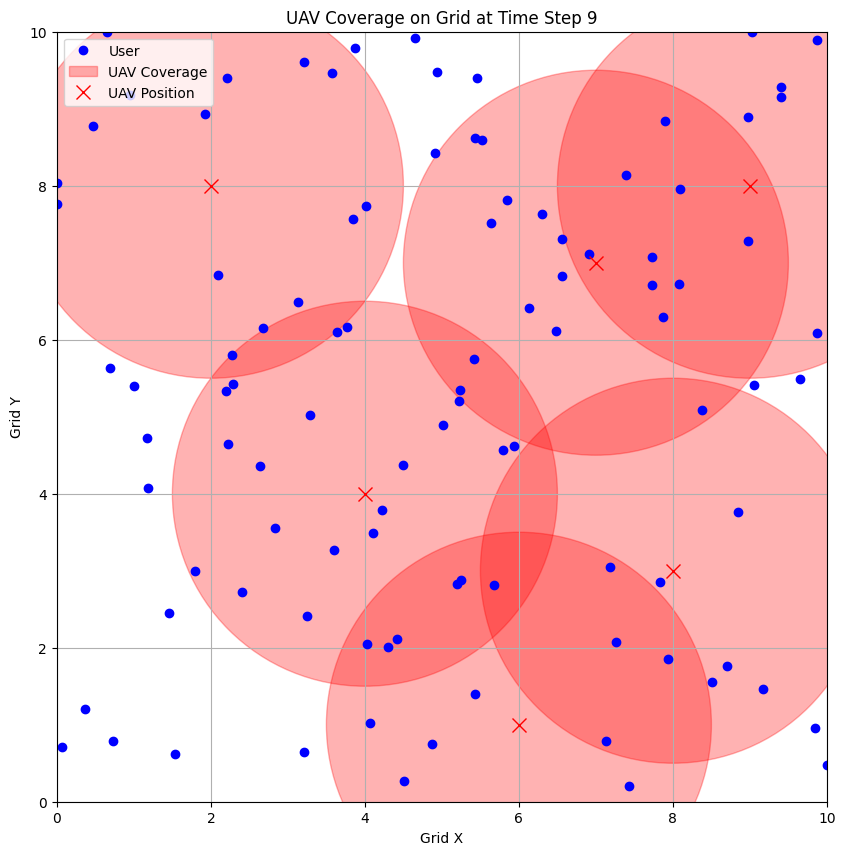

Time Step 10:
Covered users: 85
Coverage percentage: 85.00%


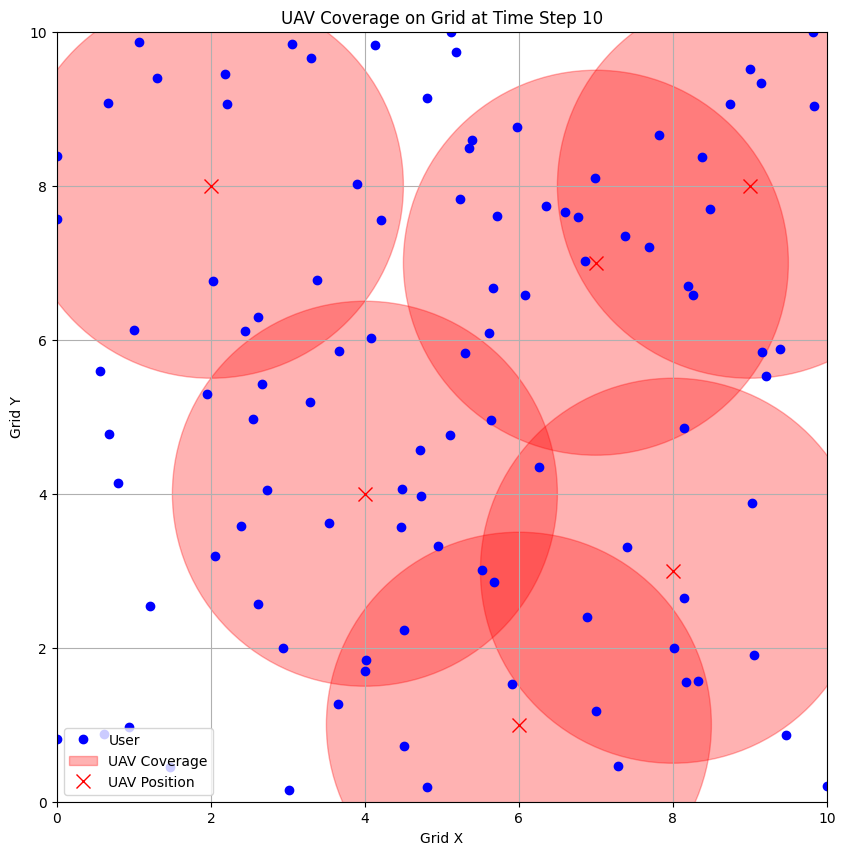

In [12]:
# Dynamic simulation loop
for t in range(1, time_steps + 1):
    move_users(users, m, n)  # Move users according to the mobility model
    
    # Recalculate coverage based on new user positions
    covered_users = set()
    for uav in selected_uavs:
        covered_users.update(users_covered_by_uav(uav, users, coverage_radius))
    
    # Print coverage stats
    print(f"Time Step {t}:")
    print(f"Covered users: {len(covered_users)}")
    print(f"Coverage percentage: {len(covered_users) / num_users * 100:.2f}%")
    
    # Visualize the current state
    visualize_grid(m, n, users, selected_uavs, coverage_radius, time_step=t)
    
    time.sleep(1)  # Optional: Pause for visualization clarity
